In [110]:
#importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")



In [111]:
#chargement du dataset
df=pd.read_csv('50_Startups (1).csv')

In [112]:
#affichage de la taille du dataset
df.shape


(50, 5)

In [113]:
# Affichage des 5 premières lignes du dataset
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [114]:
 # description du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [115]:
# decription de dataset 
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [116]:
#checking for null values   
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [117]:
#checking for duplicate values
df.duplicated().sum()

0

<Axes: >

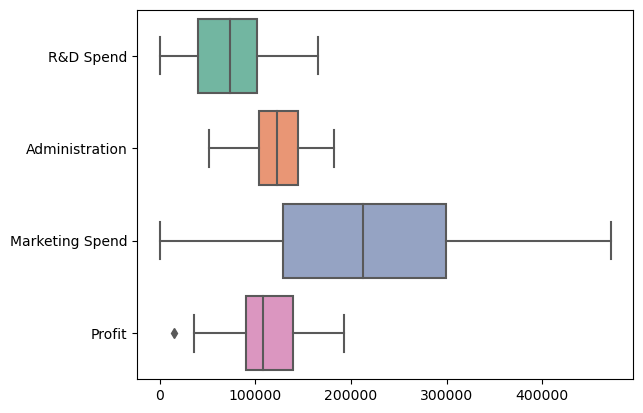

In [118]:
# check outliers
sns.boxplot(data=df, orient="h", palette="Set2")

In [119]:
#check all rows for Profit=14681.4 # before dropping the outliers 
df[df['Profit']==14681.4]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [120]:
#calculate the upper and lower bounds for the data
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


49627.07499999998


In [121]:
#removing outliers
df = df[~((df['Profit'] < (Q1 - 1.5 * IQR)) | (df['Profit'] > (Q3 + 1.5 * IQR)))]

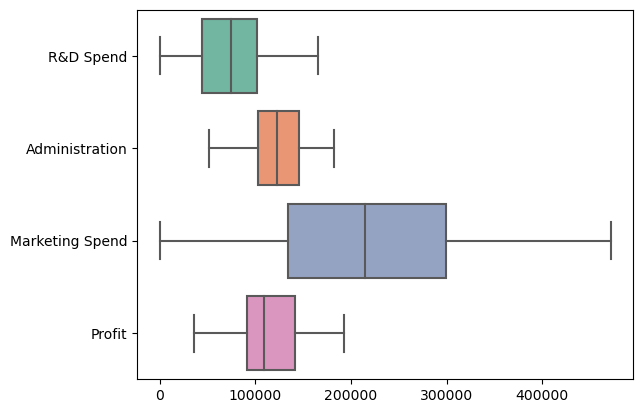

In [122]:
#check for outliers
sns.boxplot(data=df, orient="h", palette="Set2")
plt.show()

In [123]:
#verification des valeurs aberant  après suppression des outliers de valeur 14681.4        
df[df['Profit']==14681.4]

,R&D Spend,Administration,Marketing Spend,State,Profit


['Profit']==14681.4 is a outlier

In [124]:
#verification de valeur  R&D Spend=0
df[df['R&D Spend']==0]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.0,135426.92,0.0,California,42559.73


In [125]:
#print the quantile 0.05 for profit
df['Profit'].quantile(0.05)

55664.882000000005

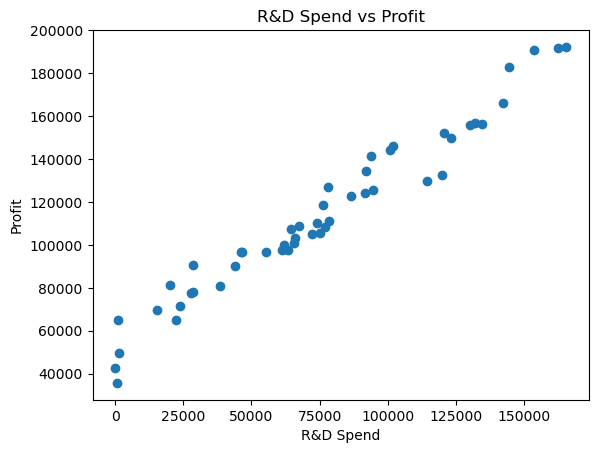

In [126]:
#utilisation de scatter plot pour visualiser la relation entre R&D Spend et Profit 
plt.scatter(df['R&D Spend'], df['Profit'])
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()


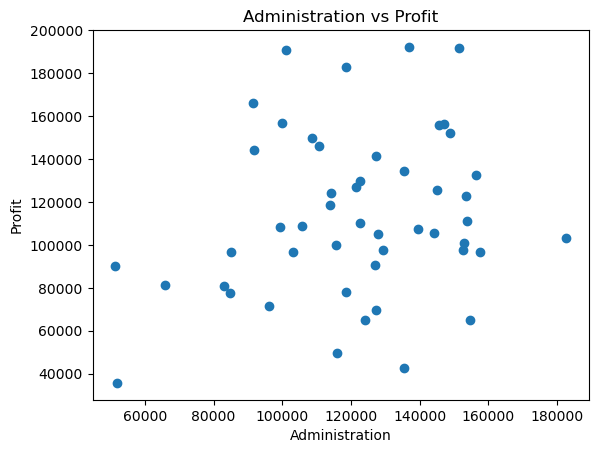

In [127]:
# utilisation de scatter plot pour visualiser la relation entre admin  et Profit
plt.scatter(df['Administration'], df['Profit'])
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()


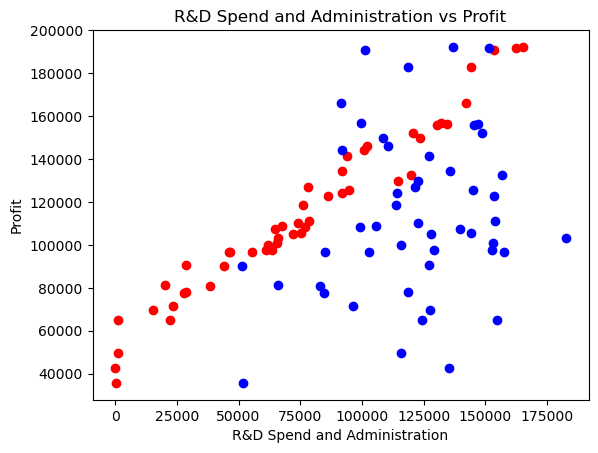

In [128]:
# verification de la correlation entre les variables r&d spend et admin vs profit
plt.scatter(df['R&D Spend'], df['Profit'], color='red')
plt.scatter(df['Administration'], df['Profit'], color='blue')
plt.title('R&D Spend and Administration vs Profit')
plt.xlabel('R&D Spend and Administration')
plt.ylabel('Profit')
plt.show()

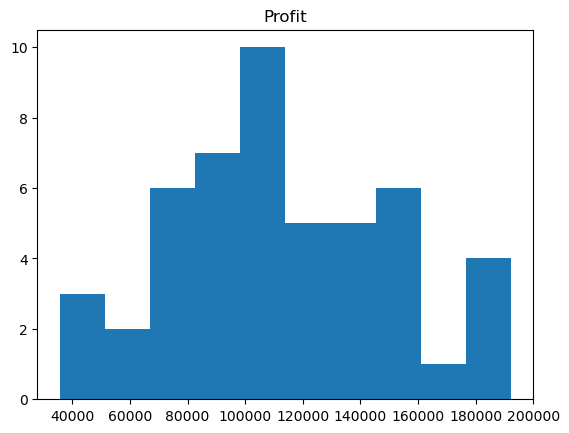

In [129]:
# utilisation de histogramme pour visualiser la distribution de profit
plt.hist(df['Profit'])
plt.title('Profit')
plt.show()


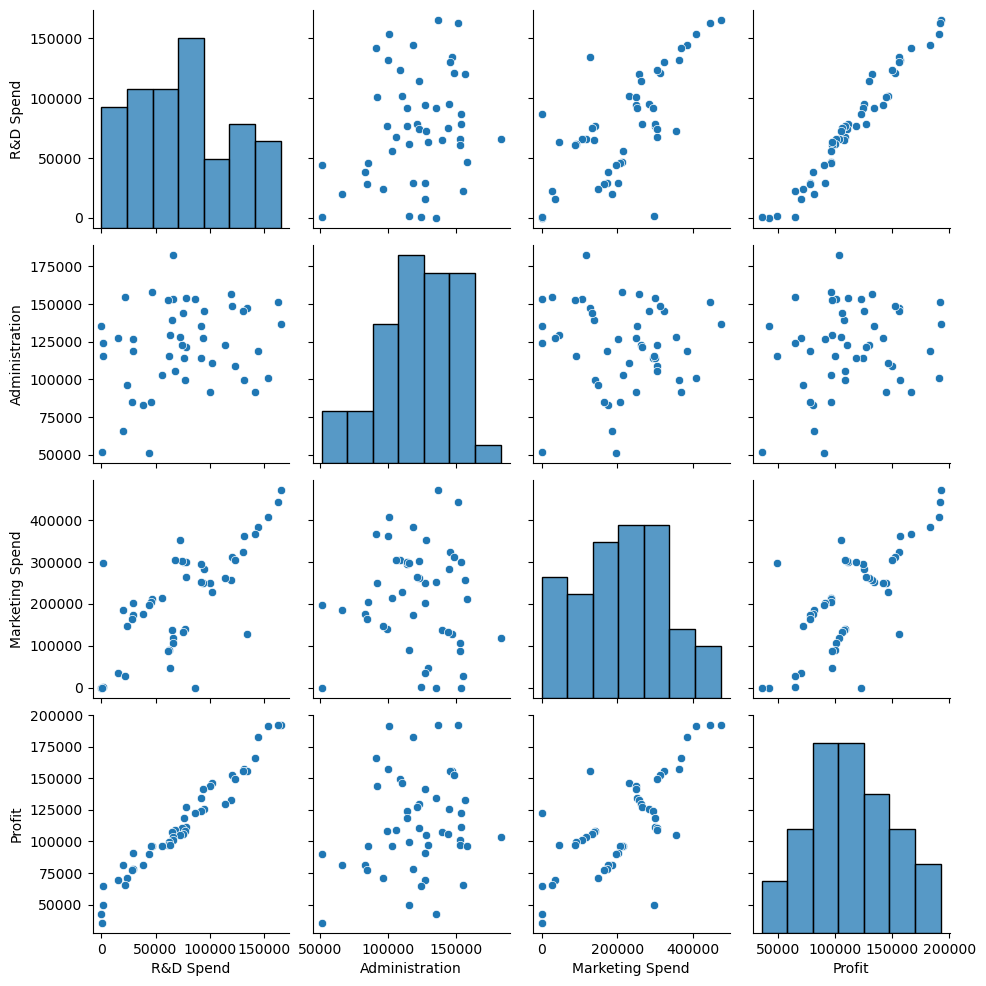

In [130]:
#pairplot pour visualiser la relation entre les variables
sns.pairplot(df)
plt.show()

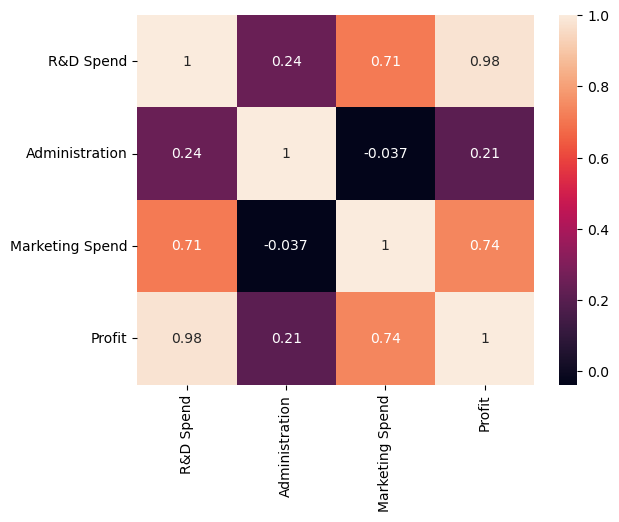

In [131]:
df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr()
#heatmap pour visualiser la correlation entre les variables
sns.heatmap(df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr(), annot=True)
plt.show()


In [132]:
#encodage de la variable catégorielle avec label encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X1=df
X1['State'] = le.fit_transform(df['State'])
X1.head()



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


## On va tester tous les types de l'encodage avec label encoder et onhotencoder et dummies 

In [133]:
X1['State'].value_counts()

State
2    17
0    16
1    16
Name: count, dtype: int64

state become label encoded : 0-1-2

In [134]:
#encoding  des valeures  catego de data avec  one hot encoding
X2=df
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X2 = np.array(ct.fit_transform(X2))
X2=pd.DataFrame(X2)
X2.head()



,0,1,2,3,4,5,6
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39
3,0.0,0.0,1.0,144372.41,118671.85,383199.62,182901.99
4,0.0,1.0,0.0,142107.34,91391.77,366168.42,166187.94


In [135]:
#encoding the categorical data with get_dummies
X3=df
X3=pd.get_dummies(X3, columns=['State'], drop_first=True)
X3.head()



,R&D Spend,Administration,Marketing Spend,Profit,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [136]:
#scaling des donnes  avec  StandardScaler of X3
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1[['R&D Spend', 'Administration', 'Marketing Spend', 'State']] = sc.fit_transform(X1[['R&D Spend', 'Administration', 'Marketing Spend', 'State']])

In [137]:
X1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,2.018325,0.552080,2.146120,1.194045,192261.83
1,1.956704,1.069017,1.913596,-1.243796,191792.06
2,1.751650,-0.724297,1.613709,-0.024876,191050.39
3,1.548545,-0.098597,1.407457,1.194045,182901.99
4,1.497818,-1.072513,1.265442,-0.024876,166187.94


In [138]:
#split the data into train and test data
from sklearn.model_selection import train_test_split
X = X1.drop('Profit', axis=1)
y = X1['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [139]:
# #split the data into train and test data
# from sklearn.model_selection import train_test_split
# X = X3.drop('Profit', axis=1)
# y = X3['Profit']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [140]:
#fit the model linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#check intercept and coefficients
b0=regressor.intercept_
b1=regressor.coef_
b0,b1


(114162.57392595198,
 array([35601.15575289,  -869.33754667,  2526.64065543,  -780.54015336]))

In [141]:
# function to train the model 
F = b0 * X_train + b1

In [142]:
#print the coef and intercept
print('intercept:', b0)
print('coef:', b1)


intercept: 114162.57392595198
coef: [35601.15575289  -869.33754667  2526.64065543  -780.54015336]


In [143]:
predictions = regressor.predict(X_test)
print(predictions)

[102319.34198788 171635.74905353 111866.25627882 101214.93514533
 101923.56610828  92103.72863478  90969.77627457  77294.5267929
 159649.07172008 136106.56037547]


In [144]:
# test the model performance with MSE and RMSE and  R2 score, RMSE and MAE

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
r2 = r2_score(y_test, predictions)
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2:', r2)




MSE: 24486928.191891797
MAE: 4142.315548576106
RMSE: 4948.426840107045
R2: 0.9707216648197781


In [145]:
# using ridge regression and lasso regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)
print('Ridge RMSE:', ridge_rmse)
print('Ridge R2:', ridge_r2)



Ridge RMSE: 4741.084560882072
Ridge R2: 0.973123824189128


In [146]:
#lasso regression
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_pred)
print('Lasso RMSE:', lasso_rmse)
print('Lasso R2:', lasso_r2)


Lasso RMSE: 4948.8122895852675
Lasso R2: 0.9707171034676924


## On constate que il y a pas de grand diff entre les resultats et les metrics realisés par rapport les resultat sans regularisation 

In [ ]:
#